# Sample Entropy (SampEn)

Measure of complexity of time-series signals. SampEn has two advantages over Approximate Entropy (ApEn): data length independence and a relatively trouble-free implementation.

For a given embedding dimension `m`, tolerance `r`, and number of data points `n`, SampEn is the negative log of the probability that if two sets of simultaneous data points of length `m` have distance `< r` then two sets of simultaneous data points of length `m + 1` also have distance `< r`.

A smaller value of SampEn indicates more self-similarity in data set or less noise. Generally, the value of `m` is set to 2 and the value of `r` is 0.2 * st.dev.

In [8]:
from typing import Sequence, Callable

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [14]:
def chebyshev_distance(x: Sequence[float], y: Sequence[float]) -> float:
    return (np.abs(np.array(x) - np.array(y))).max()


def sample_entropy(
    x: Sequence[float], 
    m: int, 
    r: float, 
    d: Callable[[Sequence[float], Sequence[float]], float]=chebyshev_distance
) -> float:
    '''
        Calculates Sample Entropy of time-series.
        
        Inputs
        ------
            x: 1-D np.array of floats
            m: embedding dimension
            r: tolerance
            d: distance function
            
        Outputs
        -------
            Estimated value of Sample Entropy
    '''
    def phi(m):
        _x = [[x[i] for i in range(i, i + m)] for i in range(len(x) - m + 1)]
        C = 1.0 * np.array([ 
            sum([1 for j in range(len(_x)) if i != j and d(_x[i], _x[j]) <= r]) for i in range(len(_x)) 
        ])
        return C.sum()
    
    return -np.log(phi(m + 1) / phi(m))

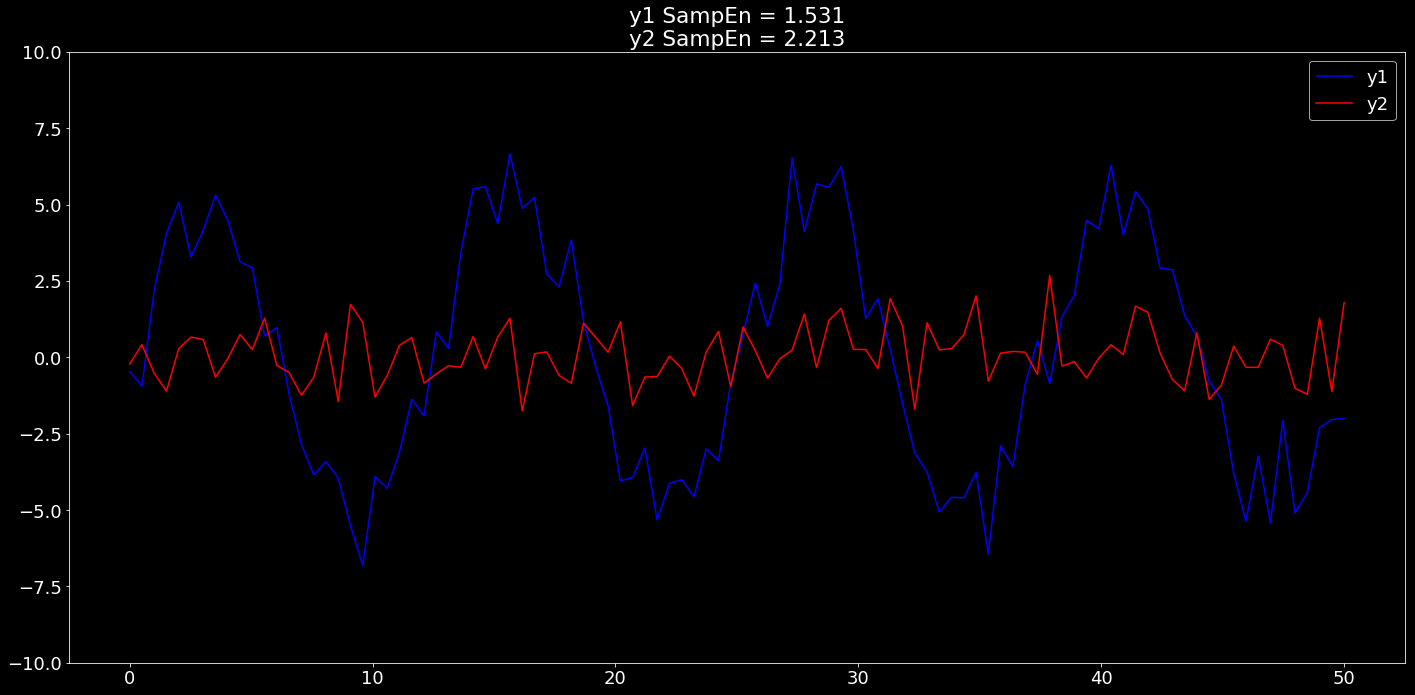

In [18]:
n = 100
x = np.linspace(0, 50, n)
y1 = 5 * np.sin(x / 2) + np.random.randn(n)
y2 = np.random.randn(n)
se1 = sample_entropy(y1, 2, 0.2 * y1.std())
se2 = sample_entropy(y2, 2, 0.2 * y2.std())

with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(20, 10))

    ax.plot(x, y1, 'b', label='y1')
    ax.plot(x, y2, 'r', label='y2')
    ax.set_ylim(-10, 10)
    ax.set_title('y1 SampEn = %.3f\ny2 SampEn = %.3f' % (se1, se2))
    ax.legend(loc='best')

    plt.tight_layout()